In [1]:
import sys
from pathlib import Path

# Add the parent directory to the Python path
sys.path.append(str(Path().resolve().parent))

from spytial import *
from spytial.annotations import *

# Disjoint Sets (Union Find?)


There are multiple possible visualizations here, depending on how much of the mechanization you might want.

- Just as sets
- Rank / parent exposed

In [4]:


VIEW = "GROUP"

@attribute(field="key")
@attribute(field="rank")
@apply_if(
    VIEW == "RANK",
    orientation(selector='{ x, y : DSUNode | (x != y) and (x.parent = y) }', directions=['above']),
    hideField(selector='{ x : DSUNode | x.parent = x }', field='parent'),
    orientation(selector='{ x, y : DSUNode | (x != y) and (@num:(x.rank) < @num:(y.rank)) }', directions=['above']),
)
@apply_if(
    VIEW != "RANK",
        orientation(selector='{ x, y : DSUNode | (x != y) and (@num:(x.rank) < @num:(y.rank)) }', directions=['above']),
    group(selector='~parent', name='set'),
    hideField(field='parent'),
    align(selector='{ x, y : DSUNode | (x != y) and (@num:(x.rank) = @num:(y.rank)) }', direction='horizontal')
)
class DSUNode:
    def __init__(self, key):
        self.key = key
        self.parent = self   # MAKE-SET
        self.rank = 0        # tree rank (upper bound on height)


class DisjointSet:
    def make_set(self, key):
        return DSUNode(key)

    # FIND-SET with path compression
    def find_set(self, x: DSUNode) -> DSUNode:
        if x.parent is not x:
            x.parent = self.find_set(x.parent)
        return x.parent

    # UNION by rank
    def union(self, x: DSUNode, y: DSUNode) -> DSUNode:
        return self._link(self.find_set(x), self.find_set(y))

    def _link(self, x_root: DSUNode, y_root: DSUNode) -> DSUNode:
        if x_root is y_root:
            return x_root
        if x_root.rank > y_root.rank:
            y_root.parent = x_root
            return x_root
        else:
            x_root.parent = y_root
            if x_root.rank == y_root.rank:
                y_root.rank += 1
            return y_root
        



In [5]:
from spytial.annotations import apply_if, flag


# Create a DisjointSet instance and some DSU nodes, perform unions, and render a diagram.
ds = DisjointSet()

# MAKE-SET for elements
a = ds.make_set("A")
b = ds.make_set("B")
c = ds.make_set("C")
d = ds.make_set("D")
e = ds.make_set("E")  # will remain a separate set



ds.union(a, b)  # union A and B
ds.union(c, d)   # union C and D
ds.union(b, c)   # connect the two trees (A,B) and (C,D) -> one larger set

# Run finds to apply path compression (so parent links are updated)
for node in (a, b, c, d, e):
    ds.find_set(node)

# Diagramming convention, hide the list wrapper
to_diagram = flag(name="hideDisconnected")(hideAtom(selector="list")([a,b,c,d,e]))
diagram(to_diagram)



# Reconstructing CLRS

Fig 21.4 (Page 569)

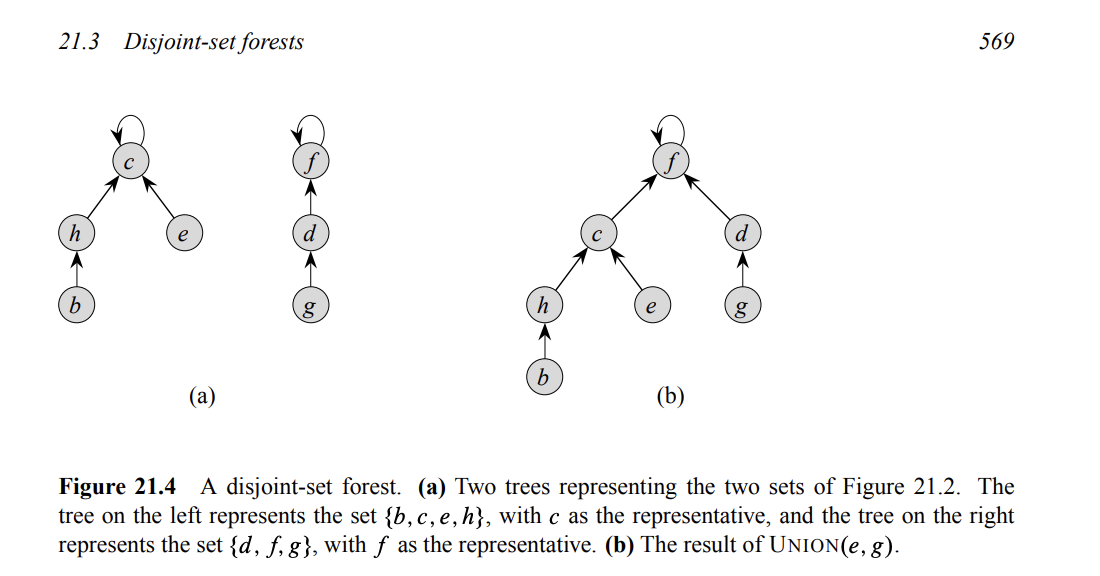